# Python Control Systems Library (python-control) Tutorial

This Jupyter notebook contains an introduction to the basic operations in the Python Control Systems Library (python-control), a Python package for control system design.  The tutorial consists of two examples:

* Example 1: Open loop analysis of a coupled mass spring system
* Example 2: Trajectory tracking for a kinematic car model

## Initialization

The python-control package can be installed using `pip` or from conda-forge.  The code below will import the control toolbox either from your local installation or via pip.  We use the prefix `ct` to access control toolbox commands:

In [1]:
# Import the packages needed for the examples included in this notebook
import numpy as np
import matplotlib.pyplot as plt

# Import the python-control package
try:
    import control as ct
    print("python-control", ct.__version__)
except ImportError:
    !pip install control
    import control as ct

python-control 0.10.1.dev324+g2fd3802a.d20241218


### Installation notes

If you get an error importing the `control` package, it may be that it is not in your current Python path.  You can fix this by setting the PYTHONPATH environment variable to include the directory where the python-control package is located.  If you are invoking Jupyter from the command line, try using a command of the form

    PYTHONPATH=/path/to/control jupyter notebook
    
If you are using [Google Colab](https://colab.research.google.com), use the following command at the top of the notebook to install the `control` package:

    !pip install control

(The import code above automatically runs this command if needed.)
    
For the examples below, you will need version 0.10.0 or higher of the python-control toolbox.  You can find the version number using the command

    print(ct.__version__)

### More information on Python, NumPy, python-control

* [Python tutorial](https://docs.python.org/3/tutorial/)
* [NumPy tutorial](https://numpy.org/doc/stable/user/quickstart.html)
* [NumPy for MATLAB users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)
* [Python Control Systems Library (python-control) documentation](https://python-control.readthedocs.io/en/latest/)

## Example 1: Open loop analysis of a coupled mass spring system

Consider the spring mass system below:

<center><img src="https://fbswiki.org/wiki/images/b/bd/Springmass-coupled.png" width=640></center>

We wish to analyze the time and frequency response of this system using a variety of python-control functions for linear systems analysis.

### System dynamics

The dynamics of the system can be written as

$$
\begin{aligned}
  m \ddot{q}_1 &= -2 k q_1 - c \dot{q}_1 + k q_2, \\
  m \ddot{q}_2 &= k q_1 - 2 k q_2 - c \dot{q}_2 + ku
\end{aligned}
$$

or in state space form:

$$
\begin{aligned}
  \dfrac{dx}{dt} &= \begin{bmatrix}
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 \\[0.5ex]
    -\dfrac{2k}{m} & \dfrac{k}{m} & -\dfrac{c}{m} & 0 \\[0.5ex]
    \dfrac{k}{m} & -\dfrac{2k}{m} & 0 & -\dfrac{c}{m}
  \end{bmatrix} x
  + \begin{bmatrix}
    0 \\ 0 \\[0.5ex] 0 \\[1ex] \dfrac{k}{m}
  \end{bmatrix} u.
\end{aligned}
$$



In [2]:
# Define the parameters for the system
m, c, k = 1, 0.1, 2
# Create a linear system
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-2*k/m, k/m, -c/m, 0],
    [k/m, -2*k/m, 0, -c/m]
])
B = np.array([[0], [0], [0], [k/m]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
D = 0

sys = ct.ss(A, B, C, D, outputs=['q1', 'q2'], name="coupled spring mass")
print(sys)

<StateSpace>: coupled spring mass
Inputs (1): ['u[0]']
Outputs (2): ['q1', 'q2']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 0.   0.   1.   0. ]
     [ 0.   0.   0.   1. ]
     [-4.   2.  -0.1  0. ]
     [ 2.  -4.   0.  -0.1]]

B = [[0.]
     [0.]
     [0.]
     [2.]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]]

D = [[0.]
     [0.]]



### Initial response

The `initial_response` function can be used to compute the response of the system with no input, but starting from a given initial condition.  This function returns a response object, which can be used for plotting.

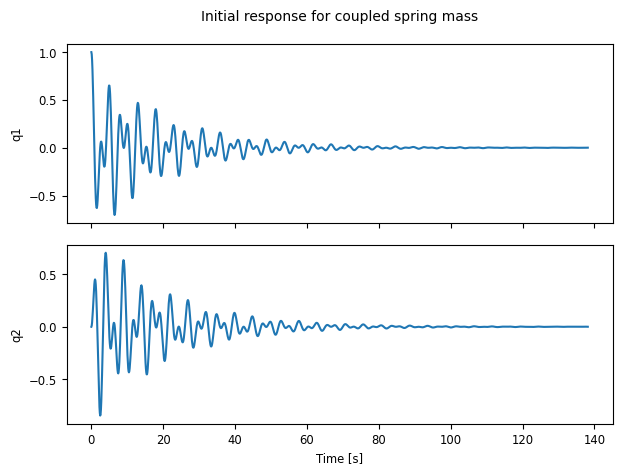

In [3]:
response = ct.initial_response(sys, X0=[1, 0, 0, 0])
cplt = response.plot()

If you want to play around with the way the data are plotted, you can also use the response object to get direct access to the states and outputs.

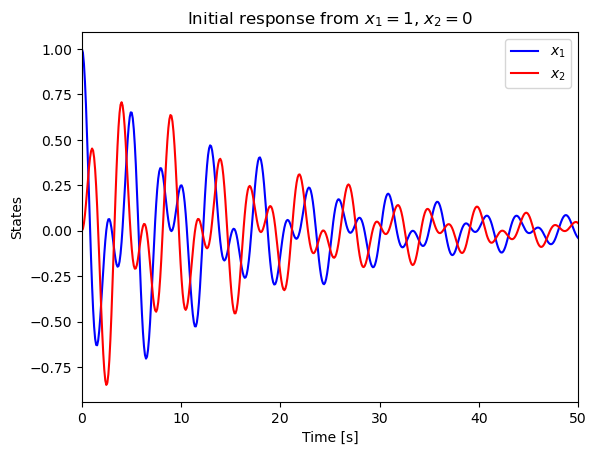

In [4]:
# Plot the outputs of the system on the same graph, in different colors
t = response.time
x = response.states
plt.plot(t, x[0], 'b', t, x[1], 'r')
plt.legend(['$x_1$', '$x_2$'])
plt.xlim(0, 50)
plt.ylabel('States')
plt.xlabel('Time [s]')
plt.title("Initial response from $x_1 = 1$, $x_2 = 0$");

There are also lots of options available in `initial_response` and `.plot()` for tuning the plots that you get.

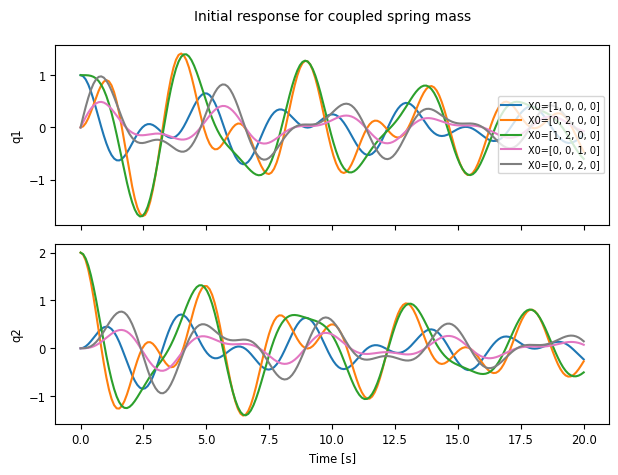

In [5]:
for X0 in [[1, 0, 0, 0], [0, 2, 0, 0], [1, 2, 0, 0], [0, 0, 1, 0], [0, 0, 2, 0]]:
  response = ct.initial_response(sys, T=20, X0=X0)
  response.plot(label=f"{X0=}")

### Step response

Similar to `initial_response`, you can also generate a step response for a linear system using the `step_response` function, which returns a time  response object:

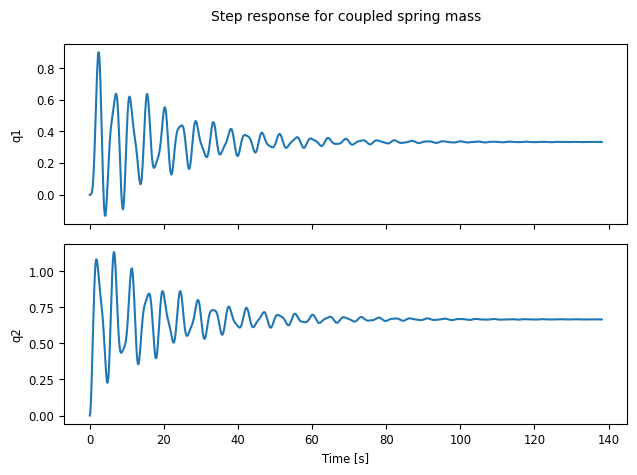

In [6]:
cplt = ct.step_response(sys).plot()

We can analyze the properties of the step response using the `stepinfo` command:

In [7]:
step_info = ct.step_info(sys)
print("Input 0, output 0 rise time = ",
      step_info[0][0]['RiseTime'], "seconds\n")
step_info

Input 0, output 0 rise time =  0.6153902252990775 seconds



[[{'RiseTime': np.float64(0.6153902252990775),
   'SettlingTime': np.float64(89.02645259326653),
   'SettlingMin': NamedSignal(-0.13272846),
   'SettlingMax': NamedSignal(0.90059949),
   'Overshoot': NamedSignal(170.17984629),
   'Undershoot': np.float64(39.81853696610825),
   'Peak': np.float64(0.9005994876222034),
   'PeakTime': np.float64(2.3589958636464634),
   'SteadyStateValue': np.float64(0.33333333333333337)}],
 [{'RiseTime': np.float64(0.6153902252990775),
   'SettlingTime': np.float64(73.6416969607896),
   'SettlingMin': NamedSignal(0.22760198),
   'SettlingMax': NamedSignal(1.13389338),
   'Overshoot': NamedSignal(70.08400657),
   'Undershoot': 0,
   'Peak': np.float64(1.13389337710215),
   'PeakTime': np.float64(6.564162403190159),
   'SteadyStateValue': np.float64(0.6666666666666665)}]]

Note that by default the inputs are not included in the step response plot (since they are a bit boring), but you can change that:

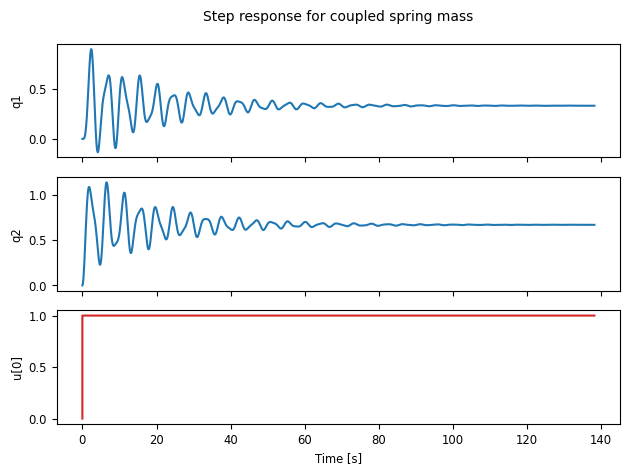

In [8]:
stepresp = ct.step_response(sys)
cplt = stepresp.plot(plot_inputs=True)

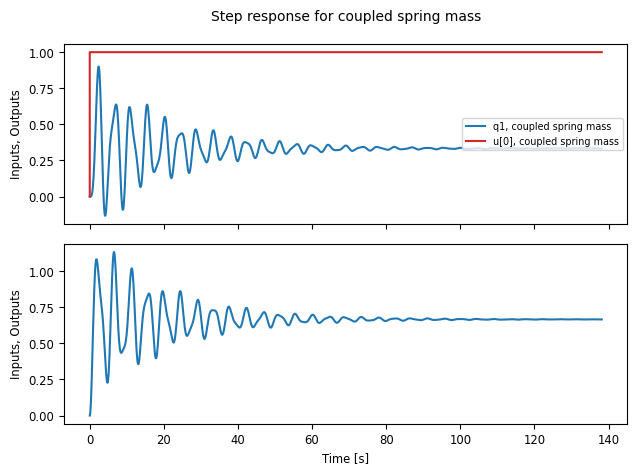

In [9]:
# Plot the inputs on top of the outputs
cplt = stepresp.plot(plot_inputs='overlay')

In [10]:
# Look at the "shape" of the step response
print(f"{stepresp.time.shape=}")
print(f"{stepresp.inputs.shape=}")
print(f"{stepresp.states.shape=}")
print(f"{stepresp.outputs.shape=}")

stepresp.time.shape=(1348,)
stepresp.inputs.shape=(1, 1, 1348)
stepresp.states.shape=(4, 1, 1348)
stepresp.outputs.shape=(2, 1, 1348)


### Forced response

To compute the response to an input, using the convolution equation, we can use the `forced_response` function:

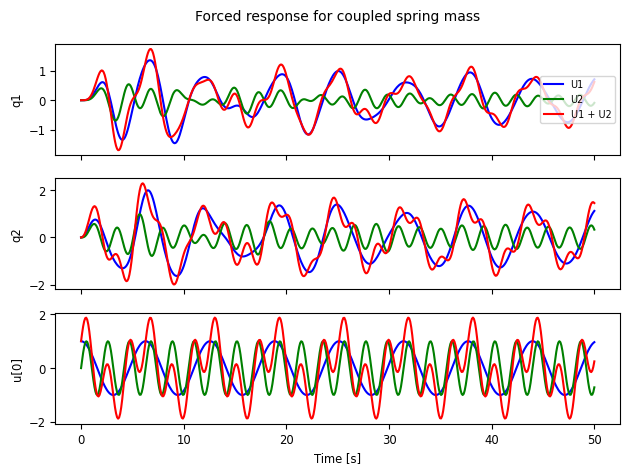

In [11]:
T = np.linspace(0, 50, 500)
U1 = np.cos(T)
U2 = np.sin(3 * T)

resp1 = ct.forced_response(sys, T, U1)
resp2 = ct.forced_response(sys, T, U2)
resp3 = ct.forced_response(sys, T, U1 + U2)

# Plot the individual responses
resp1.sysname = 'U1'; resp1.plot(color='b')
resp2.sysname = 'U2'; resp2.plot(color='g')
resp3.sysname = 'U1 + U2'; resp3.plot(color='r');

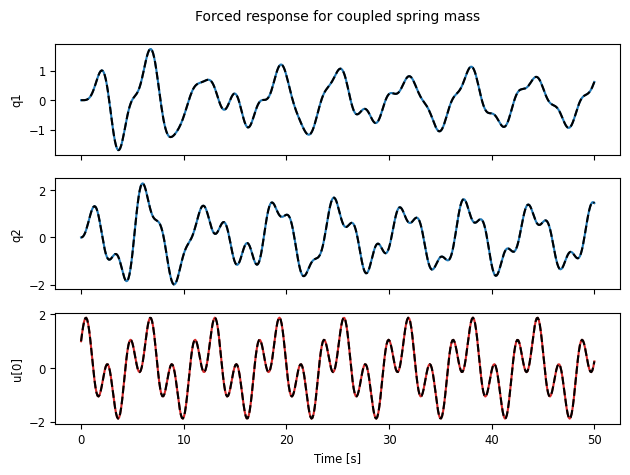

In [12]:
# Show that the system response is linear
cplt = resp3.plot()
cplt.axes[0, 0].plot(resp1.time, resp1.outputs[0] + resp2.outputs[0], 'k--')
cplt.axes[1, 0].plot(resp1.time, resp1.outputs[1] + resp2.outputs[1], 'k--')
cplt.axes[2, 0].plot(resp1.time, resp1.inputs[0] + resp2.inputs[0], 'k--');

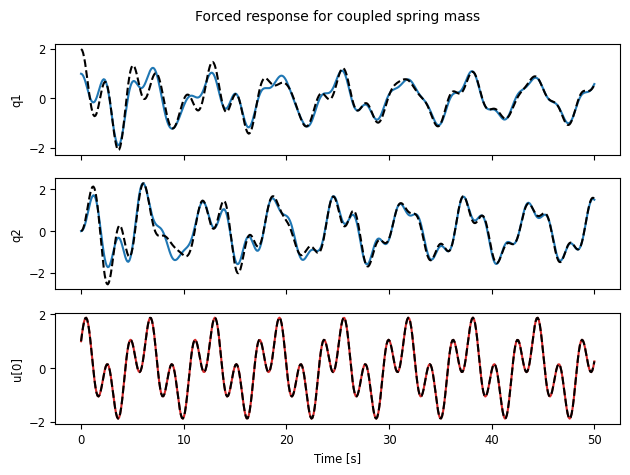

In [13]:
# Show that the forced response from non-zero initial condition is not linear
X0 = [1, 0, 0, 0]
resp1 = ct.forced_response(sys, T, U1, X0=X0)
resp2 = ct.forced_response(sys, T, U2, X0=X0)
resp3 = ct.forced_response(sys, T, U1 + U2, X0=X0)

cplt = resp3.plot()
cplt.axes[0, 0].plot(resp1.time, resp1.outputs[0] + resp2.outputs[0], 'k--')
cplt.axes[1, 0].plot(resp1.time, resp1.outputs[1] + resp2.outputs[1], 'k--')
cplt.axes[2, 0].plot(resp1.time, resp1.inputs[0] + resp2.inputs[0], 'k--');

### Frequency response

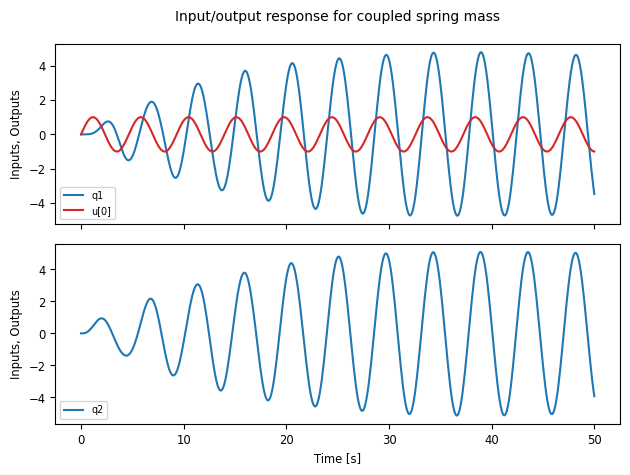

In [14]:
# Manual computation of the frequency response
resp = ct.input_output_response(sys, T, np.sin(1.35 * T))

cplt = resp.plot(
    plot_inputs='overlay', 
    legend_map=np.array([['lower left'], ['lower left']]),
    label=[['q1', 'u[0]'], ['q2', None]])

The magnitude and phase of the frequency response is controlled by the transfer function,

$$
G(s) = C (sI - A)^{-1} B + D
$$

which can be computed using the `ss2tf` function:

In [15]:
try:
    G = ct.ss2tf(sys, name='u to q1, q2')
except ct.ControlMIMONotImplemented:
    # Create SISO transfer functions, in case we don't have slycot
    G = ct.ss2tf(sys[0, 0], name='u to q1')
print(G)

<TransferFunction>: u to q1, q2
Inputs (1): ['u[0]']
Outputs (2): ['q1', 'q2']


Input 1 to output 1:
                  4
-------------------------------------
s^4 + 0.2 s^3 + 8.01 s^2 + 0.8 s + 12

Input 1 to output 2:
          2 s^2 + 0.2 s + 8
-------------------------------------
s^4 + 0.2 s^3 + 8.01 s^2 + 0.8 s + 12



In [16]:
# Gain and phase for the simulation above
from math import pi
val = G(1.35j)
print(f"{G(1.35j)=}")
print(f"Gain: {np.absolute(val)}")
print(f"Phase: {np.angle(val)}", " (", np.angle(val) * 180/pi, "deg)")

G(1.35j)=array([[3.33005647-2.70686327j],
       [3.80831226-2.72231858j]])
Gain: [[4.29143157]
 [4.681267  ]]
Phase: [[-0.6825322 ]
 [-0.62061375]]  ( [[-39.10621449]
 [-35.55854848]] deg)


In [17]:
# Gain and phase at s = 0 (= steady state step response)
print(f"{G(0)=}")
print("Final value of step response:", stepresp.outputs[0, 0, -1])

G(0)=array([[0.33333333+0.j],
       [0.66666667+0.j]])
Final value of step response: 0.33297541813724874


The frequency response across all frequencies can be computed using the `frequency_response` function:

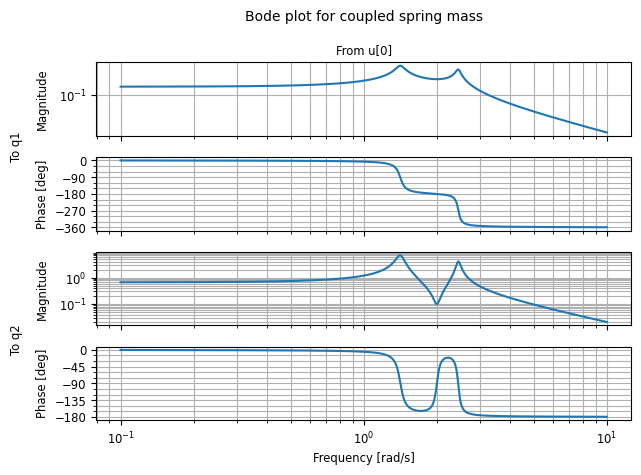

In [18]:
freqresp = ct.frequency_response(sys)
cplt = freqresp.plot()

By default, frequency responses are plotted using a "Bode plot", which plots the log of the magnitude and the (linear) phase against the log of the forcing frequency.

You can also call the Bode plot command directly, and change the way the data are presented:

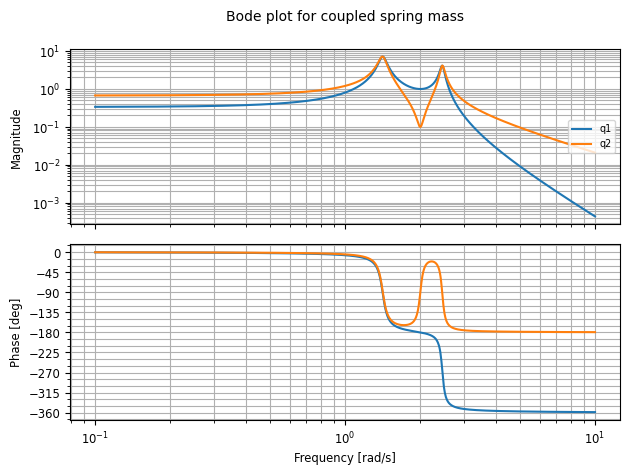

In [19]:
cplt = ct.bode_plot(sys, overlay_outputs=True)

Note the "dip" in the frequency response for $q_2$ at frequency 2 rad/sec, which corresponds to a "zero" of the transfer function.

## Example 2: Trajectory tracking for a kinematic vehicle model

This example illustrates the use of python-control to model, analyze, and design nonlinear control systems.

We make use of a simple model for a vehicle navigating in the plane, known as the "bicycle model".  The kinematics of this vehicle can be written in terms of the contact point $(x, y)$ and the angle $\theta$ of the vehicle with respect to the horizontal axis:

<table>
<tr>
    <td width="50%"><img src="https://fbswiki.org/wiki/images/5/52/Kincar.png" width=480></td>
    <td width="50%">
$$
\large\begin{aligned}
  \dot x &= \cos\theta\, v \\
  \dot y &= \sin\theta\, v \\
  \dot\theta &= \frac{v}{l} \tan \delta
\end{aligned}
$$
    </td>
</tr>
</table>

The input $v$ represents the velocity of the vehicle and the input $\delta$ represents the turning rate. The parameter $l$ is the wheelbase.

### System Definiton

We define the dynamics of the system that we are going to use for the control design.  The dynamics of the system will be of the form

$$
\dot x = f(x, u), \qquad y = h(x, u)
$$

where $x$ is the state vector for the system, $u$ represents the vector of inputs, and $y$ represents the vector of outputs.

The python-control package allows definition of input/output sytems using the `InputOutputSystem` class and its various subclasess, including the `NonlinearIOSystem` class that we use here.  A `NonlinearIOSystem` object is created by defining the update law ($f(x, u)$) and the output map ($h(x, u)$), and then calling the factory function `ct.nlsys`.

For the example in this notebook, we will be controlling the steering of a vehicle, using a "bicycle" model for the dynamics of the vehicle.  A more complete description of the dynamics of this system are available in [Example 3.11](https://fbswiki.org/wiki/index.php/System_Modeling) of [_Feedback Systems_](https://fbswiki.org/wiki/index.php/FBS) by Astrom and Murray (2020).

In [20]:
# Define the update rule for the system, f(x, u)
# States: x, y, theta (postion and angle of the center of mass)
# Inputs: v (forward velocity), delta (steering angle)
def vehicle_update(t, x, u, params):
    # Get the parameters for the model
    a = params.get('refoffset', 1.5)        # offset to vehicle reference point
    b = params.get('wheelbase', 3.)         # vehicle wheelbase
    maxsteer = params.get('maxsteer', 0.5)  # max steering angle (rad)

    # Saturate the steering input
    delta = np.clip(u[1], -maxsteer, maxsteer)
    alpha = np.arctan2(a * np.tan(delta), b)

    # Return the derivative of the state
    return np.array([
        u[0] * np.cos(x[2] + alpha),    # xdot = cos(theta + alpha) v
        u[0] * np.sin(x[2] + alpha),    # ydot = sin(theta + alpha) v
        (u[0] / a) * np.sin(alpha)      # thdot = v sin(alpha) / a
    ])

# Define the readout map for the system, h(x, u)
# Outputs: x, y (planar position of the center of mass)
def vehicle_output(t, x, u, params):
    return x

# Default vehicle parameters (including nominal velocity)
vehicle_params={'refoffset': 1.5, 'wheelbase': 3, 'velocity': 15, 
                'maxsteer': 0.5}

# Define the vehicle steering dynamics as an input/output system
vehicle = ct.nlsys(
    vehicle_update, vehicle_output, states=3, name='vehicle',
    inputs=['v', 'delta'], outputs=['x', 'y', 'theta'], params=vehicle_params)

### Open loop simulation

After these operations, the `vehicle` object references the nonlinear model for the system.  This system can be simulated to compute a trajectory for the system.  Here we command a velocity of 10 m/s and turn the wheel back and forth at one Hertz.

In [21]:
# Define the time interval that we want to use for the simualation
timepts = np.linspace(0, 10, 1000)

# Define the inputs
U = [
    10 * np.ones_like(timepts),          # velocity
    0.1 * np.sin(timepts * 2*np.pi)      # steering angle
]

# Simulate the system dynamics, starting from the origin
response = ct.input_output_response(vehicle, timepts, U, 0)
time, outputs, inputs = response.time, response.outputs, response.inputs

We can plot the results using standard `matplotlib` commands:

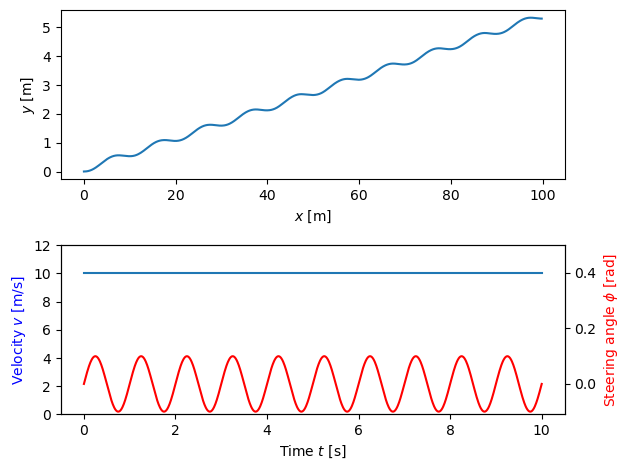

In [22]:
# Create a figure to plot the results
fig, ax = plt.subplots(2, 1)

# Plot the results in the xy plane
ax[0].plot(outputs[0], outputs[1])
ax[0].set_xlabel("$x$ [m]")
ax[0].set_ylabel("$y$ [m]")

# Plot the inputs
ax[1].plot(timepts, U[0])
ax[1].set_ylim(0, 12)
ax[1].set_xlabel("Time $t$ [s]")
ax[1].set_ylabel("Velocity $v$ [m/s]")
ax[1].yaxis.label.set_color('blue')

rightax = ax[1].twinx()       # Create an axis in the right
rightax.plot(timepts, U[1], color='red')
rightax.set_ylim(None, 0.5)
rightax.set_ylabel(r"Steering angle $\phi$ [rad]")
rightax.yaxis.label.set_color('red')

fig.tight_layout()

Notice that there is a small drift in the $y$ position despite the fact that the steering wheel is moved back and forth symmetrically around zero.  Exercise: explain what might be happening.

### Linearize the system around a trajectory

We choose a straight path along the $x$ axis at a speed of 10 m/s as our desired trajectory and then linearize the dynamics around the initial point in that trajectory.

In [23]:
# Create the desired trajectory 
Ud = np.array([10 * np.ones_like(timepts), np.zeros_like(timepts)])
Xd = np.array([10 * timepts, 0 * timepts, np.zeros_like(timepts)])

# Now linizearize the system around this trajectory
linsys = vehicle.linearize(Xd[:, 0], Ud[:, 0])

In [24]:
# Check on the eigenvalues of the open loop system
np.linalg.eigvals(linsys.A)

array([0., 0., 0.])

We see that all eigenvalues are zero, corresponding to a single integrator in the $x$ (longitudinal) direction and a double integrator in the $y$ (lateral) direction.

### Compute a state space (LQR) control law

We can now compute a feedback controller around the trajectory.  We choose a simple LQR controller here, but any method can be used.

In [25]:
# Compute LQR controller
K, S, E = ct.lqr(linsys, np.diag([1, 1, 1]), np.diag([1, 1]))

In [26]:
# Check on the eigenvalues of the closed loop system
np.linalg.eigvals(linsys.A - linsys.B @ K)

array([-1.        +0.j        , -5.06896878+2.76385399j,
       -5.06896878-2.76385399j])

The closed loop eigenvalues have negative real part, so the closed loop (linear) system will be stable about the operating trajectory.

### Create a controller with feedforward and feedback

We now create an I/O system representing the control law.  The controller takes as an input the desired state space trajectory $x_\text{d}$ and the nominal input $u_\text{d}$.  It outputs the control law

$$
u = u_\text{d} - K(x - x_\text{d}).
$$

In [27]:
# Define the output rule for the controller
# States: none (=> no update rule required)
# Inputs: z = [xd, ud, x]
# Outputs: v (forward velocity), delta (steering angle)
def control_output(t, x, z, params):
    # Get the parameters for the model
    K = params.get('K', np.zeros((2, 3)))   # nominal gain
    
    # Split up the input to the controller into the desired state and nominal input
    xd_vec = z[0:3]    # desired state ('xd', 'yd', 'thetad')
    ud_vec = z[3:5]    # nominal input ('vd', 'deltad')
    x_vec = z[5:8]     # current state ('x', 'y', 'theta')
    
    # Compute the control law
    return ud_vec - K @ (x_vec - xd_vec)

# Define the controller system
control = ct.nlsys(
    None, control_output, name='control',
    inputs=['xd', 'yd', 'thetad', 'vd', 'deltad', 'x', 'y', 'theta'], 
    outputs=['v', 'delta'], params={'K': K})

Because we have named the signals in both the vehicle model and the controller in a compatible way, we can use the autoconnect feature of the `interconnect()` function to create the closed loop system.

In [28]:
# Build the closed loop system
vehicle_closed = ct.interconnect(
    (vehicle, control),
    inputs=['xd', 'yd', 'thetad', 'vd', 'deltad'],
    outputs=['x', 'y', 'theta']
)

### Closed loop simulation

We now command the system to follow in trajectory and use the linear controller to correct for any errors. 

The desired trajectory is a given by a longitudinal position that tracks a velocity of 10 m/s for the first 5 seconds and then increases to 12 m/s and a lateral position that varies sinusoidally by $\pm 0.5$ m around the centerline.  The nominal inputs are not modified, so that feedback is required to obtained proper trajectory tracking.

In [29]:
Xd = np.array([
    10 * timepts + 2 * (timepts-5) * (timepts > 5), 
    0.5 * np.sin(timepts * 2*np.pi), 
    np.zeros_like(timepts)
])

Ud = np.array([10 * np.ones_like(timepts), np.zeros_like(timepts)])

# Simulate the system dynamics, starting from the origin
resp = ct.input_output_response(
    vehicle_closed, timepts, np.vstack((Xd, Ud)), 0)
time, outputs = resp.time, resp.outputs

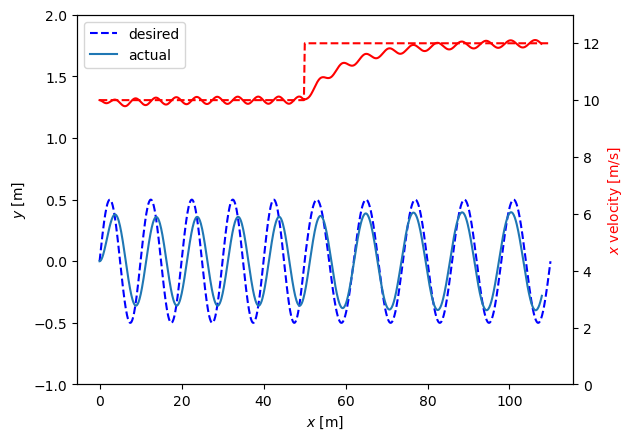

In [30]:
# Plot the results in the xy plane
plt.plot(Xd[0], Xd[1], 'b--')      # desired trajectory
plt.plot(outputs[0], outputs[1])   # actual trajectory
plt.xlabel("$x$ [m]")
plt.ylabel("$y$ [m]")
plt.ylim(-1, 2)

# Add a legend
plt.legend(['desired', 'actual'], loc='upper left')

# Compute and plot the velocity
rightax = plt.twinx()       # Create an axis in the right
rightax.plot(Xd[0, :-1], np.diff(Xd[0]) / np.diff(timepts), 'r--')
rightax.plot(outputs[0, :-1], np.diff(outputs[0]) / np.diff(timepts), 'r-')
rightax.set_ylim(0, 13)
rightax.set_ylabel("$x$ velocity [m/s]")
rightax.yaxis.label.set_color('red')

We see that there is a small error in each axis.  By adjusting the weights in the LQR controller we can adjust the steady state error (try it!)

## Computing environment

In [31]:
print("Control version:", ct.__version__)
if ct.slycot_check():
    import slycot
    print("Slycot version:", slycot.__version__)
else:
    print("Slycot version: not installed")
print("NumPy version:", np.__version__)

Control version: 0.10.1.dev324+g2fd3802a.d20241218
Slycot version: 0.6.0
NumPy version: 2.2.0
